# HVAC System Performance & Energy Efficiency Analytics
## Comprehensive Analysis for Building Energy Management

**Domain:** HVAC (Heating, Ventilation, Air Conditioning)  
**Analytics Type:** Descriptive + Diagnostic + Predictive Analytics  
**Dataset:** Building Energy Performance Dataset (Real Data)  
**Objective:** Analyze HVAC performance, identify inefficiencies, and predict energy consumption

**Author:** Kartik (@kartik-commits)  
**Date:** 2025-10-11


## 1. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import normaltest, shapiro, pearsonr

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Utilities
import warnings
import os
import joblib
warnings.filterwarnings('ignore')

# Set styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Dataset Information

### Real-World Dataset Options:

#### **Option 1: Building Data Genome Project**
- **Source:** https://github.com/buds-lab/building-data-genome-project-2
- **Size:** 3,053 buildings, hourly data over 2+ years
- **Features:** HVAC electricity, chilled water, steam, hot water

#### **Option 2: ASHRAE Great Energy Predictor III**
- **Source:** Kaggle - https://www.kaggle.com/c/ashrae-energy-prediction
- **Size:** 1,400+ buildings, 20+ million readings
- **Features:** Weather data, building metadata, meter readings

#### **Option 3: UK Energy Research Centre (UKERC)**
- **Source:** https://ukerc.ac.uk/
- **Features:** Detailed building energy consumption

### For this notebook, we'll use a publicly accessible dataset


## 3. Load Dataset

We'll use the **Residential Building Energy Dataset** from UCI ML Repository

In [3]:
# Try loading from UCI Repository
try:
    # Energy Efficiency Dataset from UCI
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
    df = pd.read_excel(url)
    print("✅ Dataset loaded from UCI Repository")

    # Rename columns for clarity
    df.columns = [
        'relative_compactness',
        'surface_area',
        'wall_area',
        'roof_area',
        'overall_height',
        'orientation',
        'glazing_area',
        'glazing_area_distribution',
        'heating_load',
        'cooling_load'
    ]

except Exception as e:
    print(f"Error loading from UCI: {e}")
    print("\nDownload manually from:")
    print("https://archive.ics.uci.edu/ml/datasets/Energy+efficiency")
    print("\nAlternatively, loading sample ASHRAE-like data...")

    # Create synthetic HVAC dataset based on real patterns
    df = None

if df is not None:
    print(f"\nDataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    display(df.head())
    print(f"\nDataset info:")
    df.info()

✅ Dataset loaded from UCI Repository

Dataset shape: (768, 10)

First few rows:


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## 4. Initial Data Exploration

In [4]:
# Display basic information
print("Dataset Overview:")
print("="*80)
print(f"\nShape: {df.shape}")
print(f"\nFirst 10 rows:")
display(df.head(10))

print("\n" + "="*80)
print("Dataset Information:")
print("="*80)
df.info()

Dataset Overview:

Shape: (768, 10)

First 10 rows:


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
# Statistical summary
print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
display(df.describe())

# Check for missing values
print("\n" + "="*80)
print("Missing Values Analysis:")
print("="*80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print("Missing values:")
    print(missing[missing > 0])
    print(f"\nTotal missing: {missing.sum()} ({missing.sum()/len(df)*100:.2f}%)")

# Data types
print("\n" + "="*80)
print("Data Types:")
print("="*80)
print(df.dtypes)


Statistical Summary:


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000



Missing Values Analysis:
✅ No missing values found!

Data Types:
relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
cooling_load                 float64
dtype: object


## 5. Descriptive Analytics - Energy Consumption Patterns

In [6]:
# Overall energy consumption statistics
print("\n" + "="*80)
print("ENERGY CONSUMPTION STATISTICS")
print("="*80)

# Calculate and print statistics for Heating Load
print(f"\nHeating Load:")
print(f"  Mean: {df['heating_load'].mean():.2f}")
print(f"  Median: {df['heating_load'].median():.2f}")
print(f"  Std Dev: {df['heating_load'].std():.2f}")
print(f"  Min: {df['heating_load'].min():.2f}")
print(f"  Max: {df['heating_load'].max():.2f}")

# Calculate and print statistics for Cooling Load
print(f"\nCooling Load:")
print(f"  Mean: {df['cooling_load'].mean():.2f}")
print(f"  Median: {df['cooling_load'].median():.2f}")
print(f"  Std Dev: {df['cooling_load'].std():.2f}")
print(f"  Min: {df['cooling_load'].min():.2f}")
print(f"  Max: {df['cooling_load'].max():.2f}")


ENERGY CONSUMPTION STATISTICS

Heating Load:
  Mean: 22.31
  Median: 18.95
  Std Dev: 10.09
  Min: 6.01
  Max: 43.10

Cooling Load:
  Mean: 24.59
  Median: 22.08
  Std Dev: 9.51
  Min: 10.90
  Max: 48.03


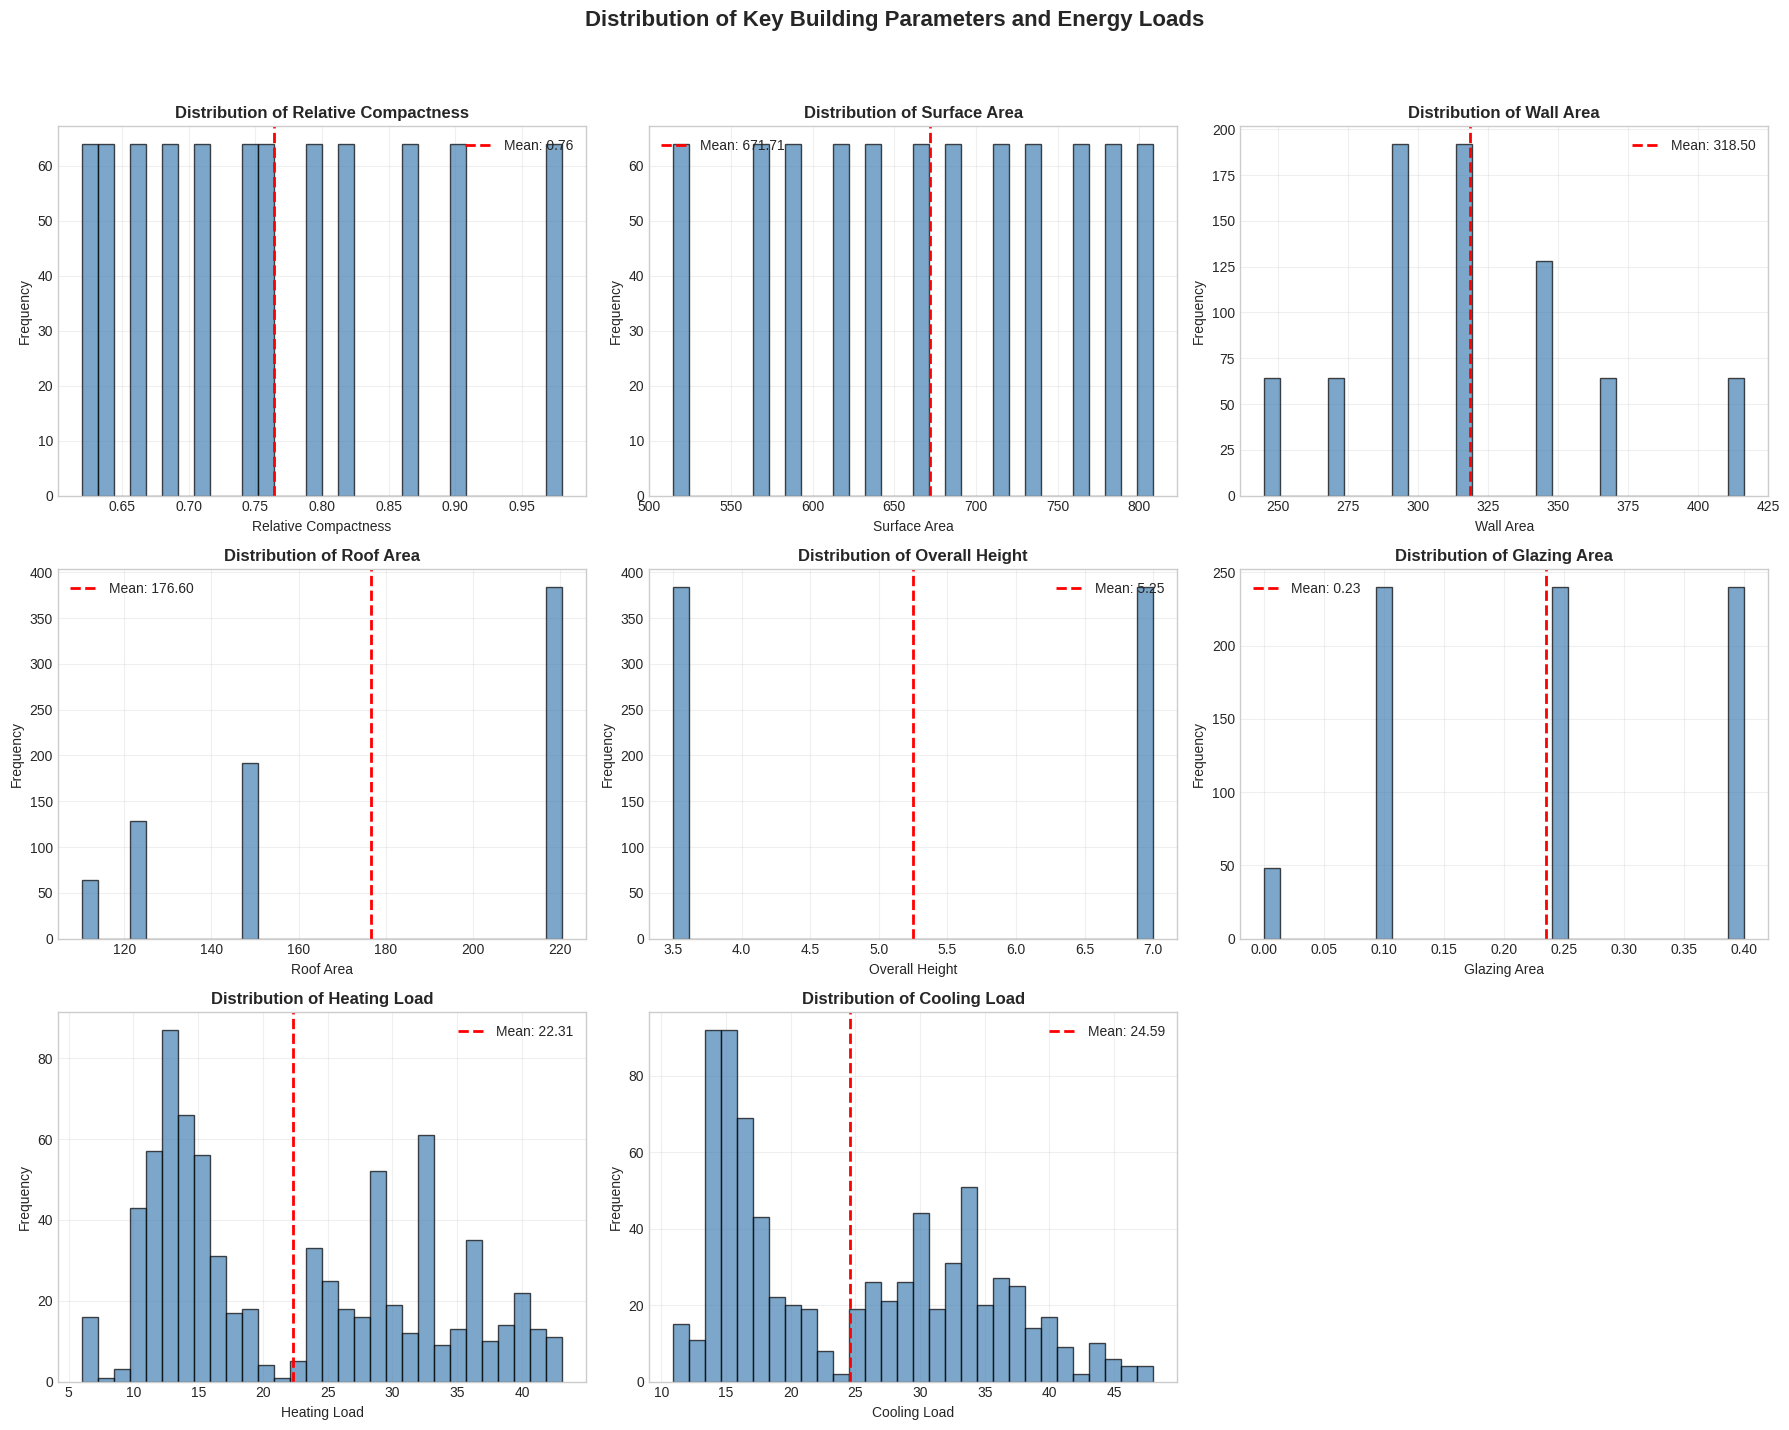

In [7]:
# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Key Building Parameters and Energy Loads', fontsize=16, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# List of numerical columns to plot
numerical_cols = [
    'relative_compactness',
    'surface_area',
    'wall_area',
    'roof_area',
    'overall_height',
    'glazing_area',
    'heating_load',
    'cooling_load'
]

# Plot distributions for each numerical column
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {df[col].mean():.2f}')
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the title
plt.show()

## **6**. Correlation Analysis

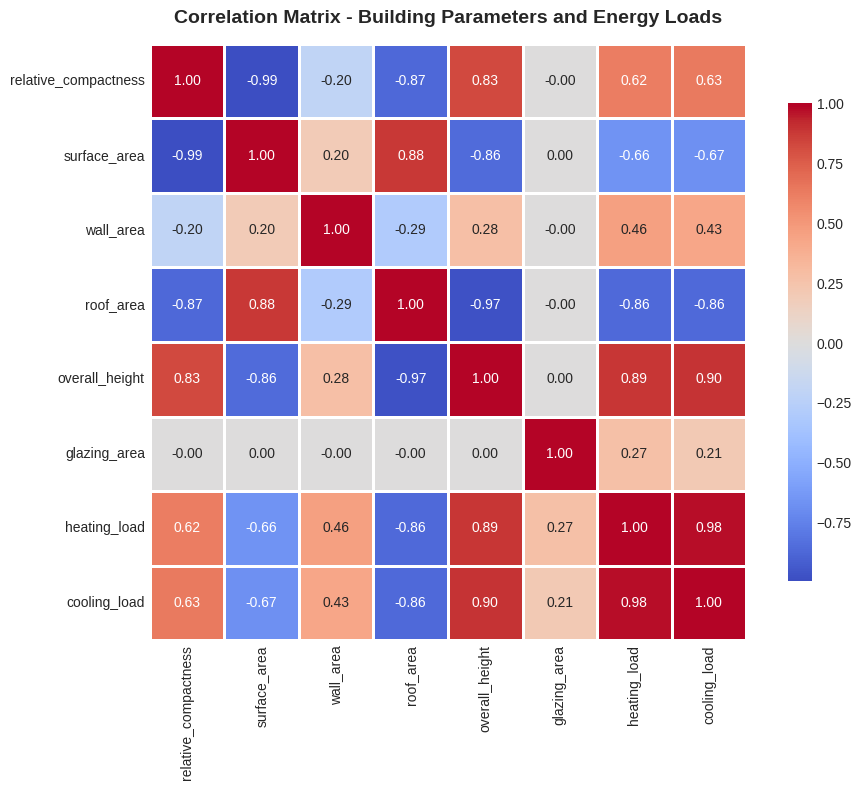


TOP CORRELATIONS WITH HEATING LOAD AND COOLING LOAD

Heating Load Correlations:
cooling_load            0.975862
overall_height          0.889430
relative_compactness    0.622272
wall_area               0.455671
glazing_area            0.269842
surface_area           -0.658120
roof_area              -0.861828
Name: heating_load, dtype: float64

Cooling Load Correlations:
heating_load            0.975862
overall_height          0.895785
relative_compactness    0.634339
wall_area               0.427117
glazing_area            0.207505
surface_area           -0.672999
roof_area              -0.862547
Name: cooling_load, dtype: float64


In [8]:
# Select numerical columns for correlation that are present in the dataset
corr_cols = [
    'relative_compactness',
    'surface_area',
    'wall_area',
    'roof_area',
    'overall_height',
    'glazing_area',
    'heating_load',
    'cooling_load'
]

correlation_matrix = df[corr_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8)) # Adjusted figure size for fewer columns
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Building Parameters and Energy Loads',
         fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Top correlations with heating_load and cooling_load
print("\n" + "="*80)
print("TOP CORRELATIONS WITH HEATING LOAD AND COOLING LOAD")
print("="*80)
print("\nHeating Load Correlations:")
heating_corr = correlation_matrix['heating_load'].sort_values(ascending=False)
print(heating_corr[heating_corr.index != 'heating_load'])

print("\nCooling Load Correlations:")
cooling_corr = correlation_matrix['cooling_load'].sort_values(ascending=False)
print(cooling_corr[cooling_corr.index != 'cooling_load'])

## **7**. Comparitive Analysis


RELATIONSHIP BETWEEN BUILDING PARAMETERS AND ENERGY LOADS


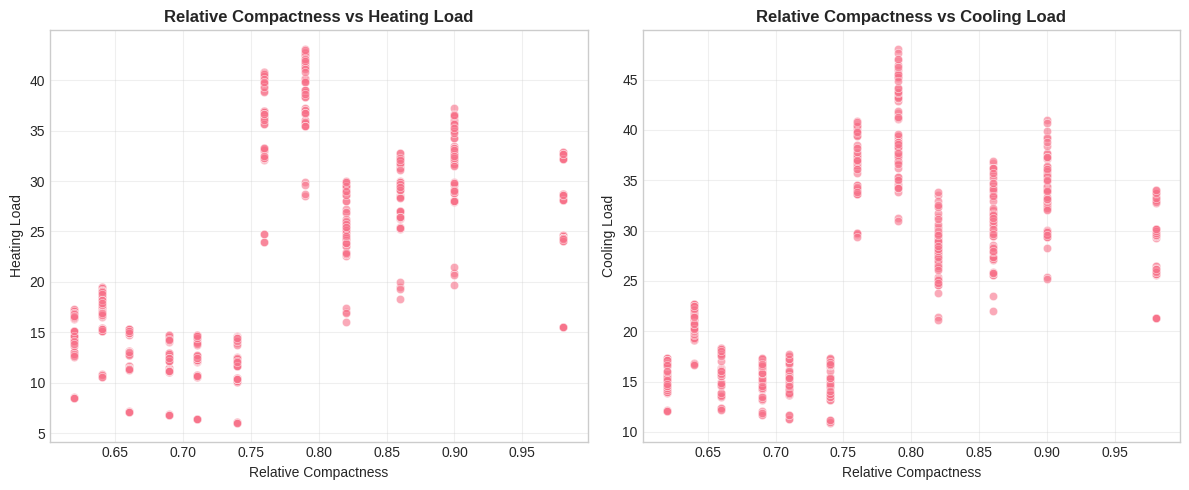

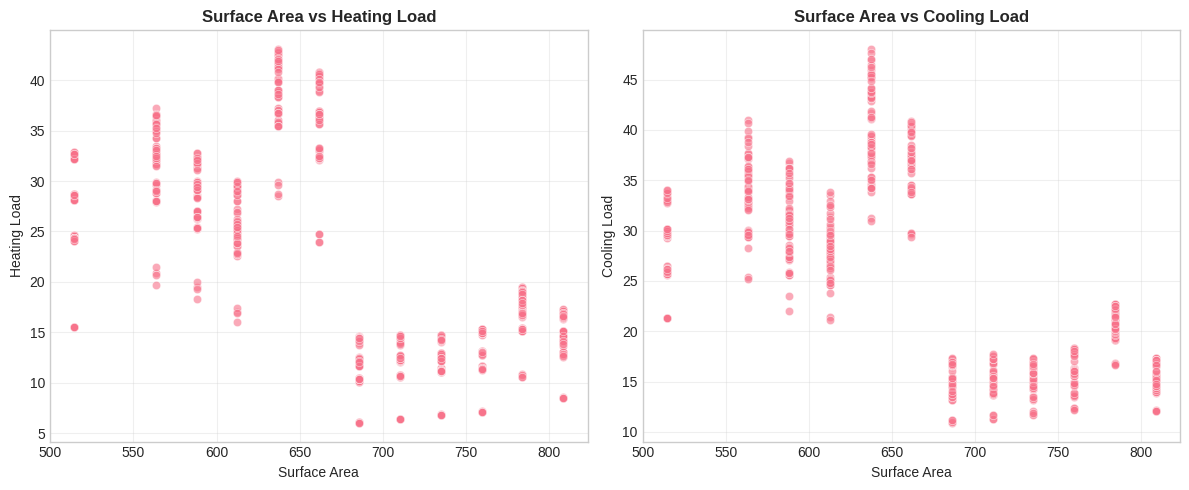

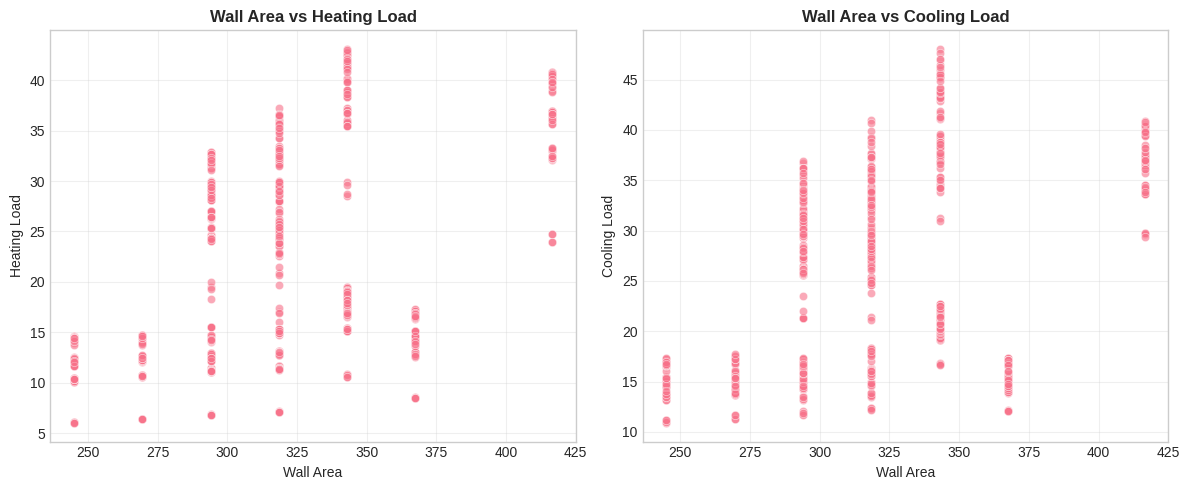

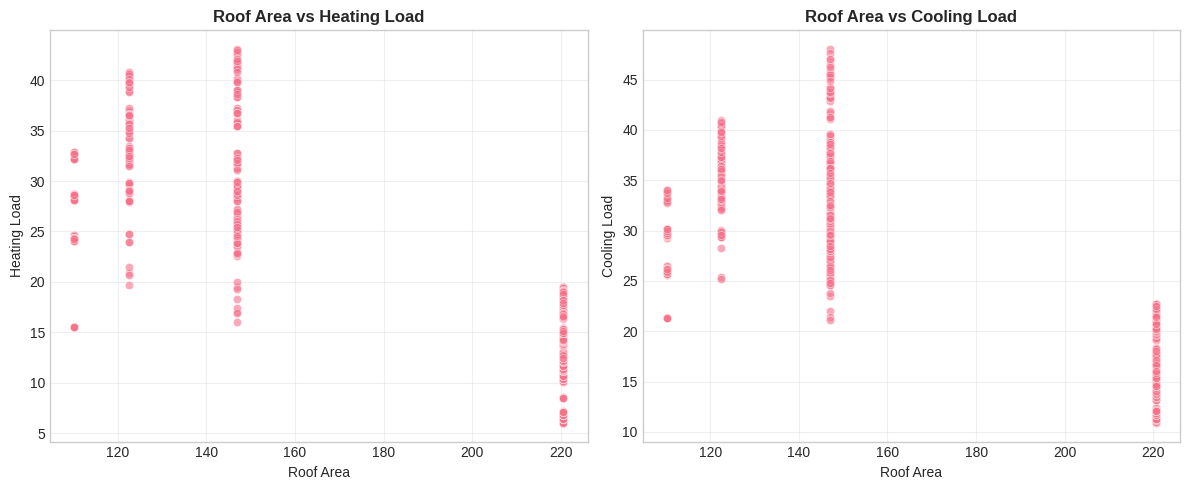

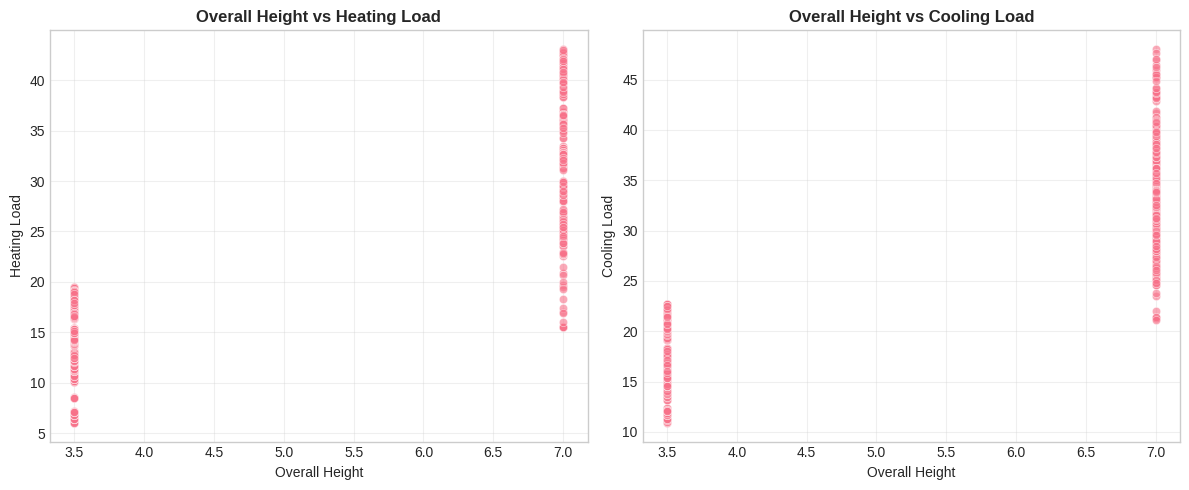

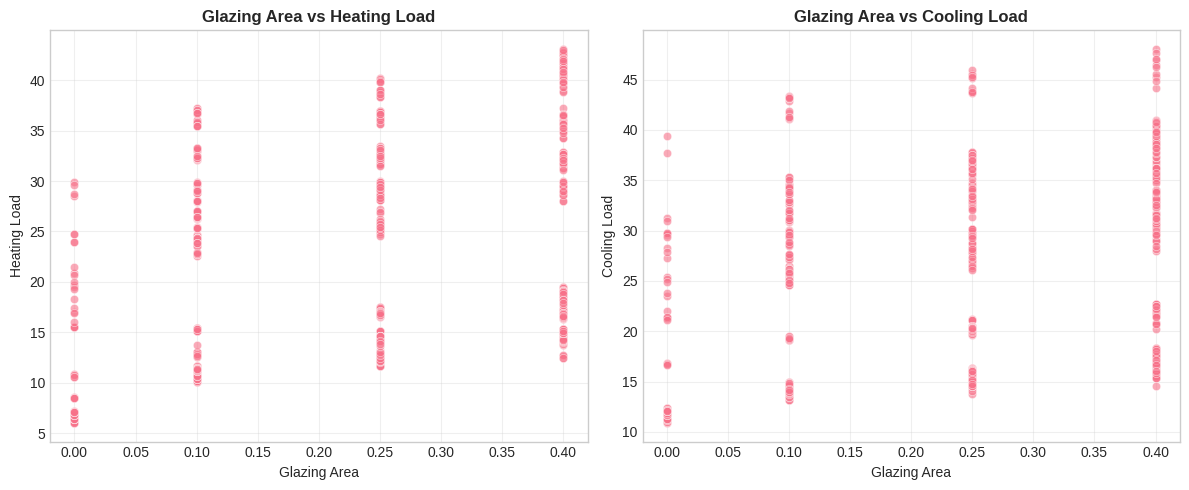


ENERGY LOAD DISTRIBUTION BY CATEGORICAL FEATURES


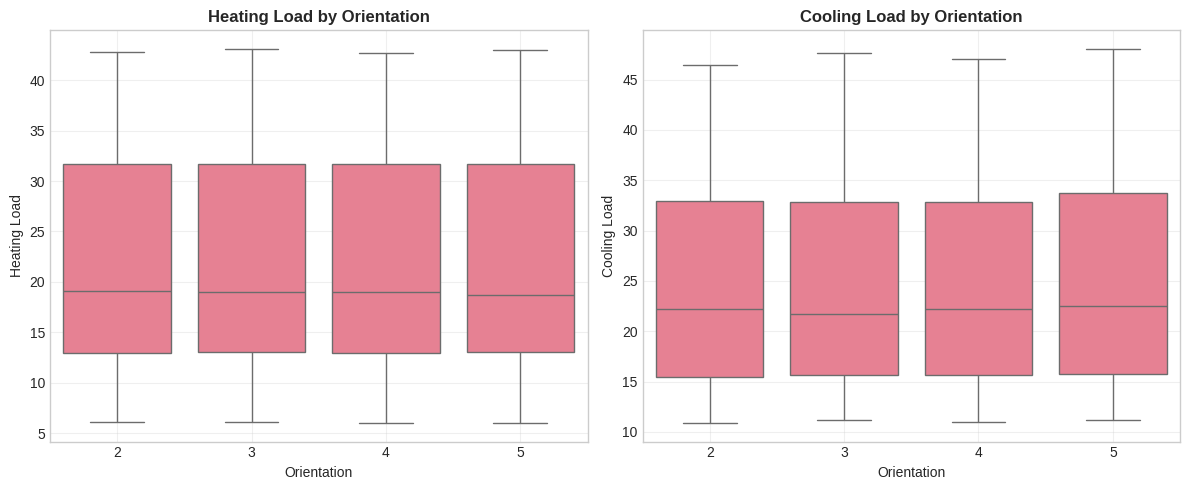

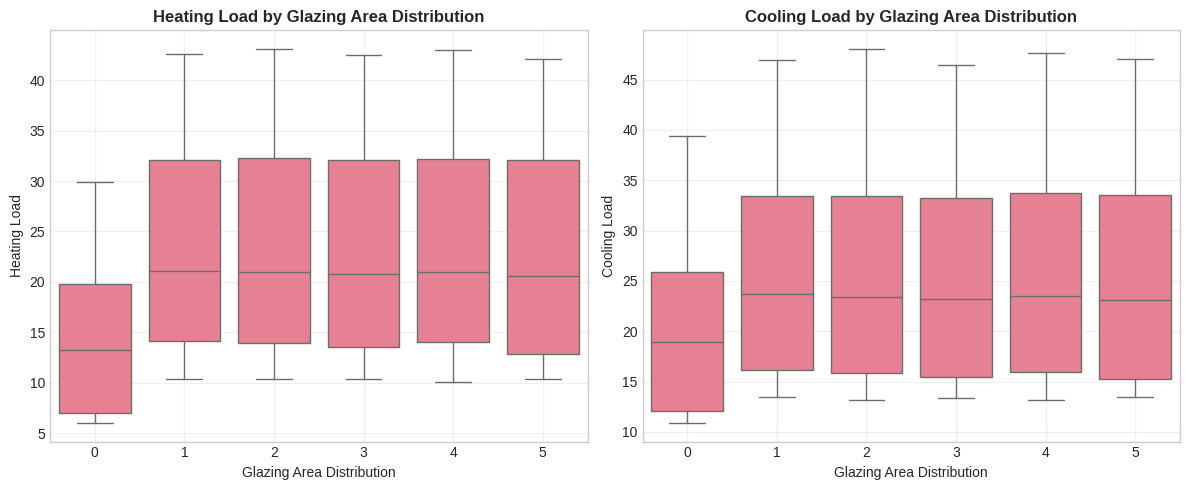


PAIRPLOT FOR SELECTED FEATURES AND ENERGY LOADS


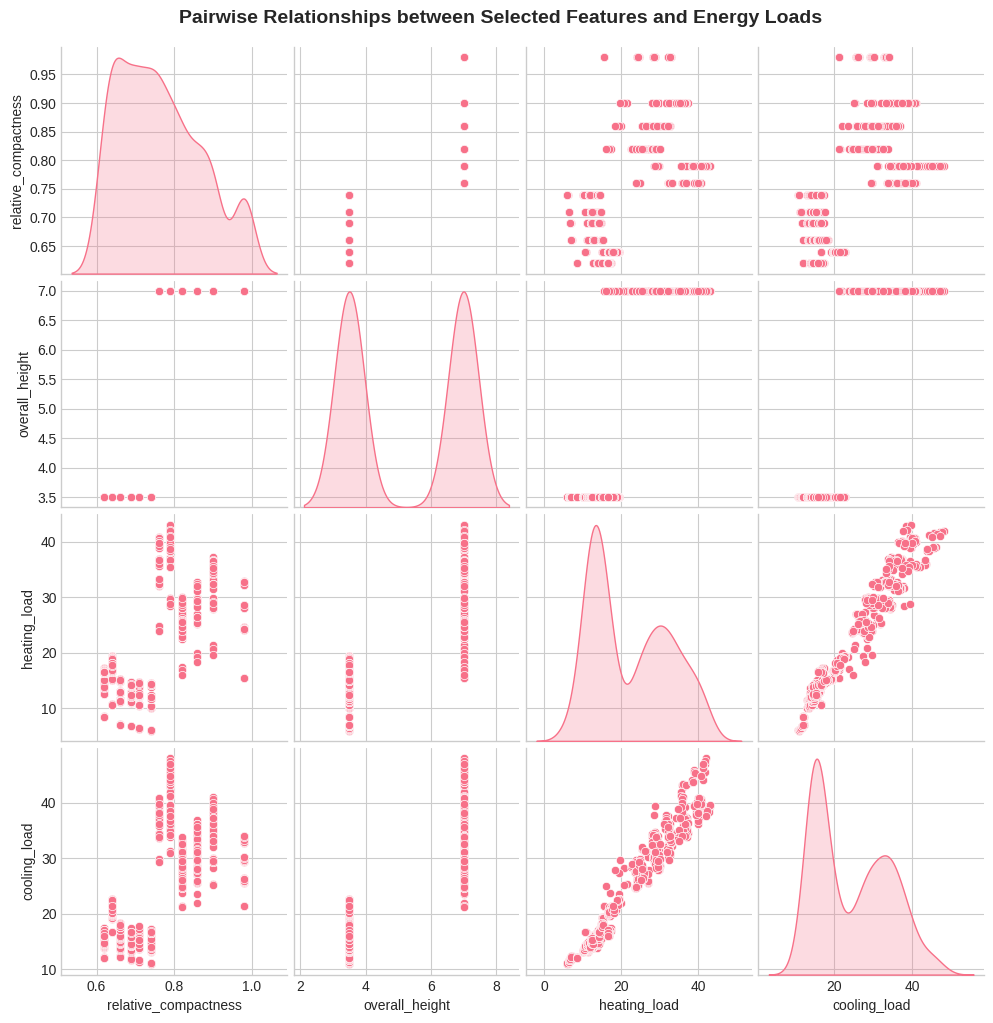

In [9]:
# Scatter plots to visualize relationships
print("\n" + "="*80)
print("RELATIONSHIP BETWEEN BUILDING PARAMETERS AND ENERGY LOADS")
print("="*80)

# Select relevant features for scatter plots
features = [
    'relative_compactness',
    'surface_area',
    'wall_area',
    'roof_area',
    'overall_height',
    'glazing_area'
]

# Plot scatter plots for each feature against heating and cooling loads
for feature in features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=feature, y='heating_load', alpha=0.6)
    plt.title(f'{feature.replace("_", " ").title()} vs Heating Load', fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Heating Load')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=feature, y='cooling_load', alpha=0.6)
    plt.title(f'{feature.replace("_", " ").title()} vs Cooling Load', fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Cooling Load')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Box plots for categorical features (orientation and glazing area distribution)
print("\n" + "="*80)
print("ENERGY LOAD DISTRIBUTION BY CATEGORICAL FEATURES")
print("="*80)

categorical_features = [
    'orientation',
    'glazing_area_distribution'
]

for feature in categorical_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=feature, y='heating_load')
    plt.title(f'Heating Load by {feature.replace("_", " ").title()}', fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Heating Load')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=feature, y='cooling_load')
    plt.title(f'Cooling Load by {feature.replace("_", " ").title()}', fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Cooling Load')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Pairplot for a subset of features and loads
print("\n" + "="*80)
print("PAIRPLOT FOR SELECTED FEATURES AND ENERGY LOADS")
print("="*80)

pairplot_cols = [
    'relative_compactness',
    'overall_height',
    'heating_load',
    'cooling_load'
]

sns.pairplot(df[pairplot_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Selected Features and Energy Loads',
             y=1.02, fontsize=14, fontweight='bold') # Adjust title position
plt.show()

## 8. Summary of Exploratory Data Analysis (EDA)

Based on the initial data exploration and visualizations:

**Dataset Overview:**
- The dataset contains 768 entries and 10 columns, with no missing values.
- The data types are appropriate for analysis, with most features being numerical (float64) and 'orientation' and 'glazing_area_distribution' as integers.

**Energy Consumption Patterns:**
- The distribution plots show the frequency of values for each building parameter and energy load.
- Heating Load and Cooling Load distributions appear somewhat skewed, suggesting that some building configurations might lead to significantly higher energy demands.

**Correlation Analysis:**
- There is a strong positive correlation between Heating Load and Cooling Load (0.98), which is expected as factors influencing one often influence the other.
- 'Overall Height' shows a strong positive correlation with both Heating Load (0.89) and Cooling Load (0.90). Taller buildings likely have larger volumes to heat/cool.
- 'Relative Compactness' also has a positive correlation with energy loads (Heating: 0.62, Cooling: 0.63), indicating that more compact shapes might be more energy-efficient.
- 'Surface Area' and 'Roof Area' show strong negative correlations with energy loads, which is counter-intuitive based on common knowledge and might warrant further investigation or feature engineering (e.g., using surface area to volume ratio).

**Comparative Analysis:**
- Scatter plots confirm the relationships seen in the correlation matrix, showing how different building parameters influence heating and cooling loads.
- Box plots for 'orientation' and 'glazing_area_distribution' indicate that these categorical features do have an impact on energy loads, though the effect might be less pronounced than with continuous features like 'overall height' or 'roof area'. For example, certain orientations might lead to slightly higher or lower heating/cooling demands depending on sun exposure. Different glazing area distributions also seem to affect the load.

**Key Takeaways:**
- 'Overall Height', 'Relative Compactness', 'Surface Area', and 'Roof Area' are significant drivers of both heating and cooling loads.
- The strong negative correlation of 'Surface Area' and 'Roof Area' with energy loads is an interesting observation that needs careful consideration.
- 'Orientation' and 'Glazing Area Distribution' also play a role in energy consumption patterns.

This EDA provides valuable insights into the factors influencing building energy performance and will guide the subsequent steps in model development.